# Decision Trees

A notebook reproducing some of the examples from section 9.2 of ESL.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from pathlib import Path

In [2]:
from mlalgos.supervised_learning.decision_trees import ClassificationTreePruned
from mlalgos.utils.error_funcs import misclassification_error, gini_index, cross_entropy, mean_squared_error
from mlalgos.utils.data_utils import cross_validation_split
from mlalgos.utils.plotting import plot_cv_results

## Import spam data

In [3]:
home = str(Path.home())
data_dir = home + '/datasets/spam/'
spam_data_file = 'spambase.data'
spam_train_test_file = 'spam.traintest'

In [4]:
col_names = ["word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our",
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_order",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_;",
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$",
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"spam"]

In [5]:
spam_data = pandas.read_csv(data_dir + spam_data_file, sep=",", header=None)
spam_data.columns = col_names

In [6]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
with open(data_dir + spam_train_test_file, 'r') as f:
    traintest = f.readlines()
traintest = [int(i[0]) for i in traintest]

In [8]:
train_inds = [i for i in range(len(traintest)) if traintest[i] == 0]
test_inds = [i for i in range(len(traintest)) if traintest[i] == 1]

In [9]:
train_data = spam_data.iloc[train_inds]
test_data = spam_data.iloc[test_inds]

In [10]:
X_spam_train = train_data[col_names[:-1]].to_numpy()
y_spam_train = train_data[col_names[-1]].to_numpy()
X_spam_test = test_data[col_names[:-1]].to_numpy()
y_spam_test = test_data[col_names[-1]].to_numpy()

In [11]:
classification_tree = ClassificationTreePruned(2)
classification_tree.fit(X_spam_train, y_spam_train)
y_predicted = classification_tree.predict(X_spam_test)
print(misclassification_error(y_spam_test, y_predicted))

0.08984375


In [12]:
cv_means_tree = []
cv_stds_tree = []
alphas = [0., 0.25, 0.5, 0.75, 1.0, 1.5, 2., 3., 4., 5., 7., 10.]
number_leaves = []
for a in alphas:
    tree = ClassificationTreePruned(a, max_depth=1000)
    # Perform 10-fold cross-validation and record the mean and std
    cv_splits = cross_validation_split(X_spam_train, y_spam_train, 10)
    errs = []
    for split in cv_splits:
        tree.reset()
        tree.fit(split['train']['X'], split['train']['y'])
        errs.append(misclassification_error(split['test']['y'], tree.predict(split['test']['X'])))
    
    # This will only be approximate since it may differ between trees
    number_leaves.append(tree.get_number_terminal())
        
    cv_means_tree.append(np.mean(errs))
    cv_stds_tree.append(np.std(errs))

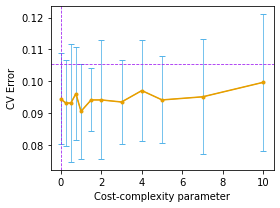

In [13]:
fig_subset = plot_cv_results(cv_means_tree, cv_stds_tree, alphas, 'Cost-complexity parameter')

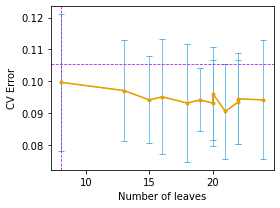

In [14]:
cv_means_sorted = [x for _, x in sorted(zip(number_leaves, cv_means_tree))]
cv_stds_sorted = [x for _, x in sorted(zip(number_leaves, cv_stds_tree))]
number_leaves = sorted(number_leaves)
fig_subset = plot_cv_results(cv_means_sorted, cv_stds_sorted, number_leaves, 'Number of leaves')

## ROC Curve

In [15]:
def custom_mode(
    L01: float=1,
    L10: float=1
) -> callable:
    """
    Modifies the Bayes rule for mode to return 1 if occurence of 1 > L01/(L01 + L10).
    Large L01 favours the 0 class, wheras small L01 favors the 1 class
    """
    def weighted_mode(y):
        num_1 = np.sum(np.array(y)==1)
        if num_1 / len(y) >= L01/(L01 + L10):
            return np.array([1]) # This instead of just 1 for compatibility, so that we apply .item() to the result
        else:
            return np.array([0])
    
    return weighted_mode

In [16]:
def specificity(y_true, y_pred):
    y_true_neg = -1 * (np.array(y_true) - 1)
    y_pred_neg = -1 * (np.array(y_pred) - 1)
    true_pos = np.sum(y_true * y_pred)
    false_neg = np.sum(y_true_neg * y_pred)
    if true_pos == 0:
        return 0
    return true_pos/(true_pos + false_neg)

def sensitivity(y_true, y_pred):
    y_true_neg = -1 * (np.array(y_true) - 1)
    y_pred_neg = -1 * (np.array(y_pred) - 1)
    true_neg = np.sum(y_true_neg * y_pred_neg)
    false_pos = np.sum(y_true * y_pred_neg)
    if true_neg == 0:
        return 0
    return true_neg/(true_neg + false_pos)

In [17]:
L01_values = np.logspace(-1, 1, 50)
sensitivities = [1.0]
specificities = [0.0]
for l01 in L01_values:
    dt = ClassificationTreePruned(2, max_depth=10, min_samples=3, mode_function=custom_mode(L01=l01))
    dt.fit(X_spam_train, y_spam_train)
    y_pred = dt.predict(X_spam_test)
    sensitivities.append(sensitivity(y_spam_test, y_pred))
    specificities.append(specificity(y_spam_test, y_pred))
sensitivities.append(0.0)
specificities.append(1.0)

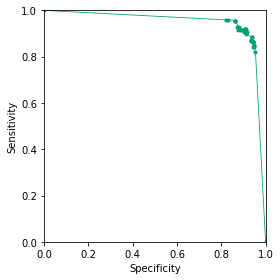

In [18]:
GREEN = '#009E73'
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(specificities, sensitivities, color=GREEN, linewidth=0.8, marker='.')
ax.set_xlabel('Specificity')
ax.set_ylabel('Sensitivity')
ax.set_xbound(lower=0, upper=1)
ax.set_ybound(lower=0, upper=1)
fig.tight_layout()
plt.show()

In [19]:
area = np.trapz(sensitivities, specificities)
print(area)

0.9452806240857584
